#### Universidade Federal de Santa Catarina
#### Programa de Pós-Graduação em Engenharia Elétrica
#### Modelagem Dinâmica de Conversores Estáticos

## Resolução da Tarefa 4

Data: 11/06/2022

Discente: Eduardo Eller Behr

![enunciado](enunciado-T4.png)

In [1]:
from matplotlib import pyplot as plt
import control as ctl
import numpy as np
import sympy as sp

### I) Função de Transferência $\frac{v_o(s)}{d(s)}$ (**sem** perdas)


In [19]:
iL1, iL2, vC1, vC2 = sp.symbols("i_{L1} i_{L2} v_{C1} v_{C2}")
d, vi, s = sp.symbols("d v_i s")
R, L1, L2, C1, C2 = sp.symbols("R L_1 L_2 C_1 C_2")

U = sp.Matrix([
    [vi]
])

# Considerando que vo = 1*vC2
C = sp.Matrix([[0, 0, 0, 1]])

# display('X=', X); 
display('U=', U); display('C=', C)

'X='

Matrix([
[i_{L1}],
[i_{L2}],
[v_{C1}],
[v_{C2}]])

'U='

Matrix([[v_i]])

'C='

Matrix([[0, 0, 0, 1]])

#### a) 1ª etapa de operação
![etapa 1](etapa-1-ideal.png)

In [13]:
A1 = sp.Matrix([
	[0,		0,		0,		0			], # iL1
	[0,		0,		1/L2,	0			], # iL2
	[0,		-1/C1,	0,		0			], # vC1
	[0,		0,		0,		-1/(R*C2)	], # vC2
#    L1		L2		C1		C2
])

B1 = sp.Matrix([
	[1/L1	], # iL1
	[0		],    # iL2
	[0		],    # vC1
	[0		],    # vC2
])

display('A1=', A1)
display('B1=', B1)


'A1='

Matrix([
[0,      0,     0,          0],
[0,      0, 1/L_2,          0],
[0, -1/C_1,     0,          0],
[0,      0,     0, -1/(C_2*R)]])

'B1='

Matrix([
[1/L_1],
[    0],
[    0],
[    0]])

#### b) 2ª Etapa de operação
![etapa 2](etapa-2-ideal.png)

In [15]:
A2 = sp.Matrix([
	[0,		0,		-1/L1,  0			], # iL1
	[0,		0,		1/L2,	-1/L2		], # iL2
	[1/C1,	-1/C1,	0,		0			], # vC1
	[0,		1/C2,	0,		-1/(R*C2)	], # vC2
#    L1		L2		C1		C2
])

B2 = sp.Matrix([
	[1/L1	],      # iL1
	[0		],      # iL2
	[0		],      # vC1
	[0		],      # vC2
])

display('A2=', A2)
display('B2=', B2)

'A2='

Matrix([
[    0,      0, -1/L_1,          0],
[    0,      0,  1/L_2,     -1/L_2],
[1/C_1, -1/C_1,      0,          0],
[    0,  1/C_2,      0, -1/(C_2*R)]])

'B2='

Matrix([
[1/L_1],
[    0],
[    0],
[    0]])

#### c) Média das duas etapas

O ponto de operação em regime permanente é dado por:

![regime](solucao-regime.png)

A função de transferencia é obtida com:

![formula-tf](formula-ss-tf.png)

In [53]:
A = d*A1 + (1-d)*A2
B = d*B1 + (1-d)*B2
X = -A**-1*B*U

G = C*((s*sp.eye(4)-A)**-1)*( (A1-A2)*X + (B1-B2)*U )
G.simplify()
display('G=', G)

'G='

Matrix([[v_i*(L_1*s*(d - 1)**2*(d**2 - 2*d + 1)*(d**3 - 3*d**2 + 3*d - 1) - R*(d - 1)*(d**3 - 3*d**2 + 3*d - 1)*(d**4 - 4*d**3 + 6*d**2 - 4*d + 1)*(C_1*L_1*d*s**2 - C_1*L_1*s**2 + d**3 - 3*d**2 + 3*d - 1) - R*(d**2 - 2*d + 1)**2*(d**3 - 3*d**2 + 3*d - 1)*(d**4 - 4*d**3 + 6*d**2 - 4*d + 1) + s*(d - 1)*(d**2 - 2*d + 1)*(d**4 - 4*d**3 + 6*d**2 - 4*d + 1)*(C_1*L_1*L_2*s**2 + L_1 + L_2*d**2 - 2*L_2*d + L_2))/((d - 1)*(d**2 - 2*d + 1)*(d**3 - 3*d**2 + 3*d - 1)*(d**4 - 4*d**3 + 6*d**2 - 4*d + 1)*(C_1*C_2*L_1*L_2*R*s**4 + C_1*L_1*L_2*s**3 + C_1*L_1*R*d**2*s**2 - 2*C_1*L_1*R*d*s**2 + C_1*L_1*R*s**2 + C_2*L_1*R*s**2 + C_2*L_2*R*d**2*s**2 - 2*C_2*L_2*R*d*s**2 + C_2*L_2*R*s**2 + L_1*s + L_2*d**2*s - 2*L_2*d*s + L_2*s + R*d**4 - 4*R*d**3 + 6*R*d**2 - 4*R*d + R))]])

Substituindo os valores numéricos

In [105]:
params = {
    L1: 1000e-6,
    L2: 100e-6,
    C1: 2e-6,
    C2: 20e-6,
    R:  50,
    d: 0.55,
    vi: 48
}

Gvd = G.subs(params)
Gvd.simplify()

Gvd = Gvd[0]
display('Gvd=',Gvd); display('X=', X.subs(params))

'Gvd='

(-1.05349794238683e-10*s**3 + 1.06666666666667e-5*s**2 - 1.0641646090535*s + 2160.0)/(2.0e-16*s**4 + 2.0e-13*s**3 + 1.0405e-6*s**2 + 0.00102025*s + 2.05031249999998)

'X='

Matrix([
[23.4110653863743],
[10.5349794238683],
[106.666666666667],
[237.037037037037]])

Convertendo para objeto TransferFunction

In [101]:
def sympy_rational_to_control_tf(rational):
    numerator, denominator = rational.as_numer_denom()
    num, den = sp.Poly(numerator).all_coeffs(), sp.Poly(denominator).all_coeffs()

    for i, _n in enumerate(num):
        num[i] = float(num[i])

    for i, _d in enumerate(den):
        den[i] = float(den[i])

    return ctl.TransferFunction(num, den)

Gvd_tf = sympy_rational_to_control_tf(Gvd)
Gvd_tf

TransferFunction(array([-1.05349794e-10,  1.06666667e-05, -1.06416461e+00,  2.16000000e+03]), array([2.0000000e-16, 2.0000000e-13, 1.0405000e-06, 1.0202500e-03,
       2.0503125e+00]))

Diagrama de Bode

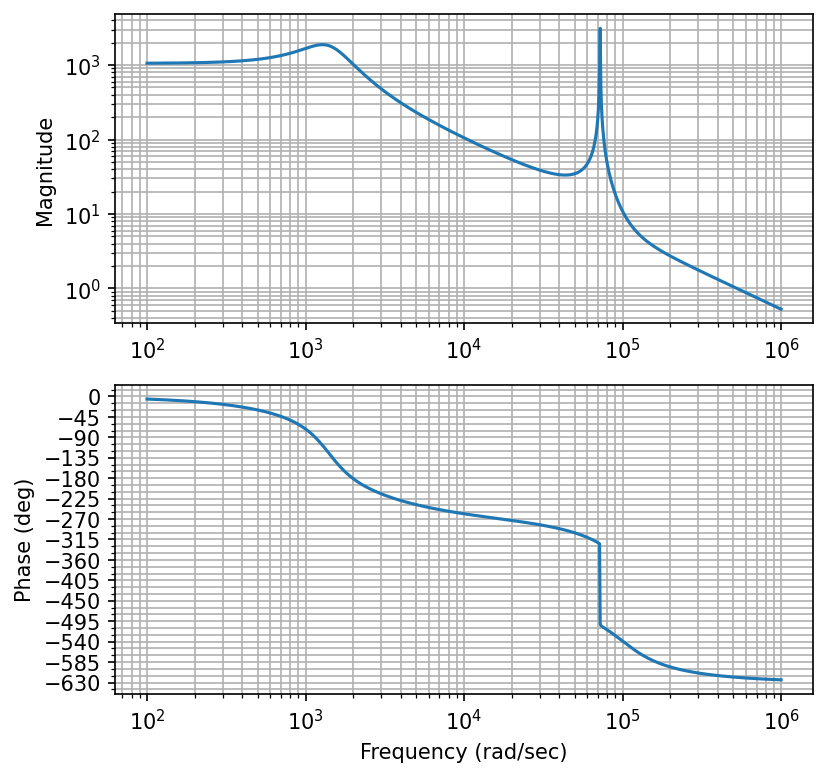

In [102]:
plt.figure(dpi=150, figsize=(6,6))
ctl.bode(Gvd_tf);

Resposta ao degrau

/home/eduardo/.local/lib/python3.10/site-packages/scipy/sparse/linalg/_matfuncs.py:708: LinAlgWarning: Ill-conditioned matrix (rcond=6.09441e-21): result may not be accurate.
  return solve(Q, P)


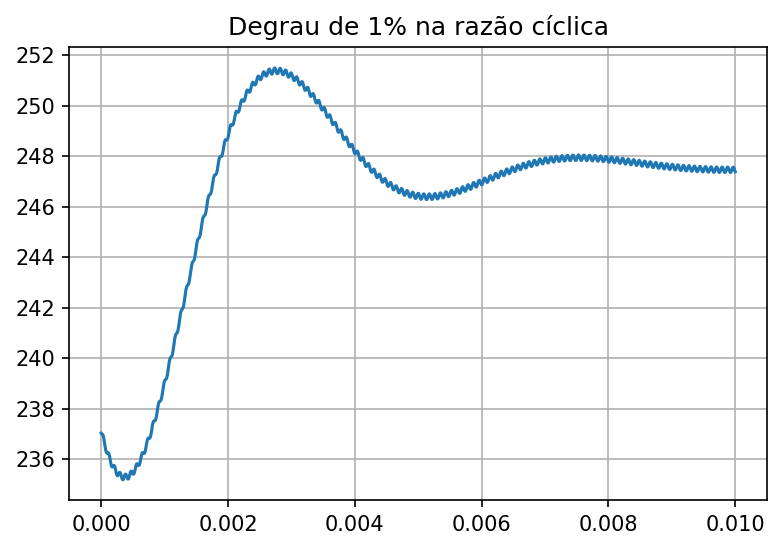

In [104]:
plt.figure(dpi=150)

t=np.linspace(0,10e-3, 1000)

Vi = 48
D = 0.55

_, x = ctl.step_response(Gvd_tf,T=t, X0=0);
plt.plot(t,x/100+Vi/(1-D)**2); plt.grid(True);
plt.title("Degrau de 1% na razão cíclica");


### II) Função de Transferência $\frac{v_o(s)}{d(s)}$ (**com** perdas)

In [111]:
Vd, RL1, RL2, Ron = sp.symbols('V_d R_{L1} R_{L2} R_{on}')

Up = sp.Matrix([
    vi,
    Vd
])

display('Up=', Up)

'Up='

Matrix([
[v_i],
[V_d]])

#### a) 1ª Etapa de operação

![etapa 1 perdas](etapa-1-perdas.png)

In [ ]:
A1p = sp.Matrix([
	[-(RL1+Ron)/L1,	0,				0,				0			], # iL1
	[,				-(RL2+Ron)/L2,	1/L2,			0			], # iL2
	[0,				-1/C1,			0,				0			], # vC1
	[0,				0,				0,				-1/(R*C2)	], # vC2
#    L1				L2				C1				C2
])

# entradas:  vi e vd
B1p = sp.Matrix([
	[1/L1,	-1/L1	],	# iL1
	[0,				],	# iL2
	[0,				],	# vC1
	[0,				],	# vC2
#	vi		vd
])

display('A1=', A1)
display('B1=', B1)

<h1 style="color: orange;"> <b> TODO... </b> </h1>

### IV) Simulações para validação

Para fins de comparação, foram simulados os seguintes modelos em Ngspice com captura de esquemático e geração de gráficos do KiCad:

1. Circuito comutado
2. Médio de grandes sinais com circuito equivalente (PWM Switch Modelling)
3. Médio de grandes sinais (equações diferenciais de estados)

Os parâmetros de circuito considerados em todo o desenvolvimento estão listados abaixo:

```
.tran 100ns 30ms uic   ; Simulação transiente até 30ms de passo 100ns com condições iniciais zeradas
```

```
.param Vi=48V          ; Tensão de entrada
.param RSd=1u          ; Resistência série nos diodos
.param Vd=0            ; Queda de tensão nos diodos
.param L1=1000uH
.param L2=100uH
.param C1=2uF
.param C2=20uF
.param R=50
```





Abaixo está ilustrado o modelo comutado:

![comutado](modelo_comutado.png)

Em seguida, o modelo de equações diferenciais de estados:

![ode](modelo_ode.png)


A figura abaixo ilustra o resultado do degrau de $d = 0.55$ para $ d =0.56$ aos $15 ms$ da análise transiente.

Observação: os modelos 2 e 3 se sobrepõem totalmente, impossibilitando distinção mútua.

![step](step_response_spice.png)